In [51]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

4287.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sqlplus-2.6.5-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [31]:
'''from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/HDAC.csv'
df = pd.read_csv(file_path,sep=';',on_bad_lines='skip')
df'''

"from google.colab import drive\ndrive.mount('/content/drive')\nfile_path = '/content/drive/My Drive/HDAC.csv'\ndf = pd.read_csv(file_path,sep=';',on_bad_lines='skip')\ndf"

In [32]:
from google.colab import files
data=files.upload()

ModuleNotFoundError: No module named 'google'

In [2]:
df = pd.read_csv('curated-solubility-dataset.csv',on_bad_lines='skip')

In [3]:
df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [4]:
cleaned_df = df.dropna()
cleaned_df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [5]:
selected_columns=['SMILES','Solubility']
filter_df = pd.DataFrame(cleaned_df,columns=selected_columns)

In [6]:
filter_df['Solubility'].max()

np.float64(2.1376816201)

In [7]:
filter_df['Solubility'].min()

np.float64(-13.1719)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
solubility_threshold=[]

for i in filter_df.Solubility:
  if float(i) >= -1:
      solubility_threshold.append("Rank I")
  elif float(i) >= -4:
      solubility_threshold.append("Rank II")
  else:
      solubility_threshold.append("Rank III")



In [12]:
count_r1=0
for ele in solubility_threshold:
  if ele=="Rank I":count_r1+=1

print(count_r1)


2201


In [13]:
solubility_class = pd.Series(solubility_threshold, name='solubility_class')
final_df = pd.concat([filter_df, solubility_class], axis=1)
final_df

,SMILES,Solubility,solubility_class
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,Rank II
1,O=C1Nc2cccc3cccc1c23,-3.254767,Rank II
2,Clc1ccc(C=O)cc1,-2.177078,Rank II
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,Rank II
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,Rank III
...,...,...,...
9977,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,Rank II
9978,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,Rank II
9979,c1(cc(ccc1C(C)C)C)O,-2.190000,Rank II
9980,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,Rank II


In [14]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [15]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt


calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)


def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)


descriptors = filter_df['SMILES'].apply(calculate_descriptors) # calculating descriptors for all smiles in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors as lists to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame


[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerator
[21:26:18] DEPRECATION WARNING: please use MorganGenerat

In [16]:
cleaned_final = results_df.dropna()
print(f"Original DataFrame shape: {results_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

Original DataFrame shape: (9982, 213)
Cleaned DataFrame shape: (9098, 213)


In [23]:
c=0
check=cleaned_final['solubility_class']
for ele in check:
  if ele=='Rank I': c+=1

print(c)

1797


In [20]:
print(cleaned_final)

                                                 SMILES  Solubility  \
0                   [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127   
1                                  O=C1Nc2cccc3cccc1c23   -3.254767   
2                                       Clc1ccc(C=O)cc1   -2.177078   
4     C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065   
5                                        Cc1cccc(C=C)c1   -3.123150   
...                                                 ...         ...   
9977                     C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C   -3.010000   
9978  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000   
9979                                c1(cc(ccc1C(C)C)C)O   -2.190000   
9980  COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...   -3.980000   
9981              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000   

     solubility_class  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0             Rank II           2.296832        2.296832           0

In [21]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = cleaned_final.copy()

# numeric columns excluding 'FDA_APPROVED'
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'FDA_APPROVED'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

print(df_robust.head())



                                              SMILES  Solubility  \
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -0.311763   
1                               O=C1Nc2cccc3cccc1c23   -0.191418   
2                                    Clc1ccc(C=O)cc1    0.167491   
4  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -0.660098   
5                                     Cc1cccc(C=C)c1   -0.147585   

  solubility_class  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0          Rank II          -2.630141       -2.630141          -0.598308   
1          Rank II           0.249171        0.249171          -0.579240   
2          Rank II          -0.179466       -0.179466           1.376921   
4         Rank III          -1.639505       -1.639505           0.563894   
5          Rank II          -2.196837       -2.196837           3.004999   

   MinEStateIndex       qed       SPS     MolWt  ...  fr_sulfide  \
0        0.371280 -1.230390  0.020664  1.122145  ...         0.0  

In [35]:
invalid_count = 0

# Maximum value for float32
float32_threshold = np.finfo(np.float32).max

# Iterate through all rows and columns
rows_to_drop = []

for index, row in df_robust.iterrows():
    for value in row:
        # Check if the value is numeric before applying isinf or comparing thresholds
        if pd.api.types.is_numeric_dtype(type(value)):
            if pd.isnull(value) or np.isinf(value) or abs(value) > float32_threshold:
                rows_to_drop.append(index)
                invalid_count += 1
                break  # Break after marking the row to drop
        else:
            # If it's not numeric, just check for NaN
            if pd.isnull(value):
                rows_to_drop.append(index)
                invalid_count += 1
                break

# Drop rows that contain invalid values
df_robust.drop(rows_to_drop, inplace=True)

# Output the number of invalid entries dropped
print(f"Dropped {invalid_count} invalid entries.")


/var/folders/8j/qv80bccs7cx4r1nlkxz8fjj00000gn/T/ipykernel_81570/3350245557.py:13: RuntimeWarning: overflow encountered in cast
  if pd.isnull(value) or np.isinf(value) or abs(value) > float32_threshold:


Dropped 6 invalid entries.


In [36]:
y = df_robust['solubility_class']
X = df_robust.drop(columns=['SMILES', 'Solubility','solubility_class'])

In [37]:
X.shape

(9092, 210)

In [38]:
print(y)
print(X.head())

0        Rank II
1        Rank II
2        Rank II
4       Rank III
5        Rank II
          ...   
9977     Rank II
9978     Rank II
9979     Rank II
9980     Rank II
9981    Rank III
Name: solubility_class, Length: 9092, dtype: object
   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          -2.630141       -2.630141          -0.598308        0.371280   
1           0.249171        0.249171          -0.579240        0.376522   
2          -0.179466       -0.179466           1.376921        0.914296   
4          -1.639505       -1.639505           0.563894        0.690784   
5          -2.196837       -2.196837           3.004999        1.361875   

        qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt  \
0 -1.230390  0.020664  1.122145        0.955389    1.116922   
1  0.382014  0.402158 -0.385278       -0.356801   -0.384635   
2 -0.027086 -0.475278 -0.578418       -0.546468   -0.580919   
4 -0.264203  3.249481  1.324742        1.284430    1.32597

In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming y = df_robust['bioactivity_class']
# and X is df_robust.drop(columns=['pIC50', 'Smiles', 'Molecule ChEMBL ID', 'Standard Type', 'Rank'])

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the entire dataset
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to map features to their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 25 features
selected_features = importance_df.head(25)['Feature'].tolist()

print("Top n features:", selected_features)


Top n features: ['MolLogP', 'MolMR', 'PEOE_VSA6', 'LabuteASA', 'Ipc', 'SlogP_VSA2', 'Chi3v', 'Chi0v', 'Chi1v', 'ExactMolWt', 'Chi2v', 'Chi4v', 'MinPartialCharge', 'TPSA', 'MolWt', 'MaxAbsPartialCharge', 'BCUT2D_LOGPHI', 'BertzCT', 'Chi0', 'Chi1n', 'Chi2n', 'SMR_VSA7', 'BCUT2D_LOGPLOW', 'PEOE_VSA1', 'HeavyAtomMolWt']


In [58]:
#selected_features=['BCUT2D_MRLOW', 'VSA_EState3', 'MaxPartialCharge', 'VSA_EState7', 'PEOE_VSA2', 'SMR_VSA3', 'BCUT2D_LOGPLOW', 'BalabanJ', 'BCUT2D_MRHI', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'VSA_EState4', 'VSA_EState2', 'MaxAbsEStateIndex', 'BCUT2D_CHGHI', 'BCUT2D_LOGPHI', 'BCUT2D_MWLOW', 'AvgIpc', 'FpDensityMorgan3', 'SPS', 'BCUT2D_CHGLO', 'MaxEStateIndex', 'VSA_EState5', 'Kappa3']
X_selected = pd.DataFrame(X, columns=selected_features)

X_selected.head()

,MolLogP,MolMR,PEOE_VSA6,LabuteASA,Ipc,SlogP_VSA2,Chi3v,Chi0v,Chi1v,ExactMolWt,...,MaxAbsPartialCharge,BCUT2D_LOGPHI,BertzCT,Chi0,Chi1n,Chi2n,SMR_VSA7,BCUT2D_LOGPLOW,PEOE_VSA1,HeavyAtomMolWt
0,0.698353,1.111325,2.677828,1.108074,1.149150,0.794847,0.781428,1.503841,1.282915,1.116922,...,3.951878,-0.262917,-0.357601,0.785479,1.654616,1.798246,-0.675329,-2.375021,2.667725,0.955389
1,0.105390,-0.187549,0.206633,-0.290973,-0.011628,-0.662401,-0.080340,-0.402085,-0.288131,-0.384635,...,-0.607881,0.429062,0.352957,-0.361661,-0.164993,-0.100843,0.321571,0.337581,-0.070697,-0.356801
2,0.008765,-0.574601,0.188519,-0.575064,-0.060126,-0.641373,-0.510085,-0.640079,-0.613768,-0.580919,...,-0.765582,-0.518478,-0.375825,-0.682063,-0.653566,-0.651344,0.152654,1.142629,-0.972350,-0.546468
4,0.135905,1.538695,0.206633,1.522106,1209.628311,3.283458,1.397801,1.402869,1.552819,1.325972,...,-0.273044,0.193586,0.963889,1.397829,1.967224,2.101790,0.741987,-0.451272,3.902784,1.284430
5,0.194193,-0.460747,0.827189,-0.615766,-0.060207,-0.990164,-0.502630,-0.612880,-0.586892,-0.729060,...,-2.105536,-0.653896,-0.356052,-0.682063,-0.511022,-0.485949,0.321801,1.222190,-0.972350,-0.742069


In [59]:
data=X_selected.copy()
data['bioactivity_class']=y

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target = 'bioactivity_class'

In [60]:
y.unique()

array(['Rank II', 'Rank III', 'Rank I'], dtype=object)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

y_train_pred=rf_classifier.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

      Rank I       0.81      0.74      0.77       376
     Rank II       0.81      0.84      0.82       925
    Rank III       0.84      0.81      0.82       518

    accuracy                           0.81      1819
   macro avg       0.82      0.80      0.81      1819
weighted avg       0.81      0.81      0.81      1819

Confusion Matrix:
[[280  95   1]
 [ 63 781  81]
 [  4  94 420]]


In [79]:
# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred))


Classification Report:
              precision    recall  f1-score   support

      Rank I       1.00      0.99      1.00      1421
     Rank II       1.00      1.00      1.00      3738
    Rank III       1.00      1.00      1.00      2114

    accuracy                           1.00      7273
   macro avg       1.00      1.00      1.00      7273
weighted avg       1.00      1.00      1.00      7273



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier with adjustments
rf_classifier = RandomForestClassifier(
    n_estimators=100,          # Increase number of trees
    max_depth=10,              # Limit maximum depth of trees
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples at a leaf node
    random_state=42
)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can also evaluate training predictions
y_train_pred = rf_classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

      Rank I       0.83      0.68      0.75       376
     Rank II       0.80      0.86      0.83       925
    Rank III       0.85      0.83      0.84       518

    accuracy                           0.82      1819
   macro avg       0.82      0.79      0.81      1819
weighted avg       0.82      0.82      0.82      1819

Confusion Matrix:
[[255 120   1]
 [ 48 800  77]
 [  4  83 431]]
Training Accuracy: 0.8955039186030523


In [76]:
# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred))


Classification Report:
              precision    recall  f1-score   support

      Rank I       0.94      0.77      0.85      1421
     Rank II       0.87      0.95      0.90      3738
    Rank III       0.93      0.89      0.91      2114

    accuracy                           0.90      7273
   macro avg       0.91      0.87      0.89      7273
weighted avg       0.90      0.90      0.89      7273



In [45]:
X_train.shape

(7273, 25)

In [55]:
from sklearn.model_selection import learning_curve


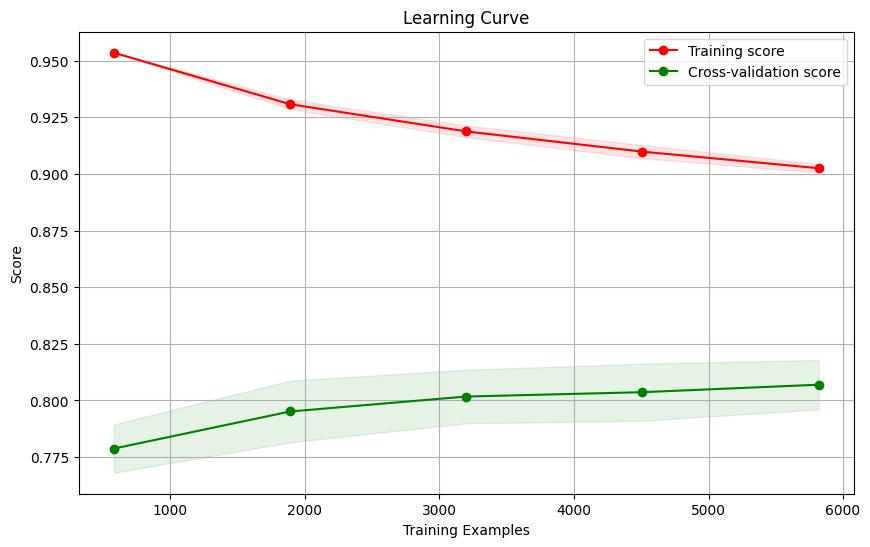

In [82]:
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    # Mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the RandomForestClassifier
plot_learning_curve(rf_classifier, X_train, y_train)

In [ ]:
drugs=files.upload()

Saving test_drugs.txt to test_drugs.txt


In [ ]:
drug_test = pd.read_csv('test_drugs.txt', delimiter='\t',names=['smiles'])

In [ ]:
drug_test.head()

,smiles
0,CSNN1CCN(C)C(C=Cc2ccccc2)C1
1,CC1CN(C)CCN(C)C1Cc1ccccc1
2,CNC(=O)c1cnc(N2CCN(C(C=Cc3ccccc3)CN3CCN(C)CC3)CC2)nc1
3,CONC(=O)C1=CN=C(N2CCC(C(C=Cc3ccccc3)CN3CCN(C)CC3)CC2)C1
4,CN1CCN(N(C)N)CC1C=Cc1ccccc1


In [ ]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt


calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)


def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)


descriptors = drug_test['smiles'].apply(calculate_descriptors) # calculating descriptors for all smiles in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors as lists to a new data frame, whose column heading is the descriptor name
results_dt = pd.concat([drug_test, desc], axis=1) # make a final data frame


[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerator
[16:42:03] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
cleaned_dt= results_df.dropna()
print(f"Original DataFrame shape: {results_dt.shape}")
print(f"Cleaned DataFrame shape: {cleaned_dt.shape}")

Original DataFrame shape: (50, 211)
Cleaned DataFrame shape: (50, 211)


In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
robust_dt = cleaned_dt.copy()

# numeric columns excluding 'FDA_APPROVED'
numeric_columns1 = robust_dt.select_dtypes(include=['float64', 'int64']).columns
numeric_columns1 = [col for col in numeric_columns1 if col != 'FDA_APPROVED'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
robust_dt[numeric_columns1] = scaler.fit_transform(robust_dt[numeric_columns1])

print(robust_dt.head())



                                                    smiles  MaxAbsEStateIndex  \
0                              CSNN1CCN(C)C(C=Cc2ccccc2)C1         -72.917018   
1                                CC1CN(C)CCN(C)C1Cc1ccccc1         -79.990237   
2    CNC(=O)c1cnc(N2CCN(C(C=Cc3ccccc3)CN3CCN(C)CC3)CC2)nc1           2.098657   
3  CONC(=O)C1=CN=C(N2CCC(C(C=Cc3ccccc3)CN3CCN(C)CC3)CC2)C1           4.431829   
4                              CN1CCN(N(C)N)CC1C=Cc1ccccc1         -50.850150   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed       SPS  \
0      -72.917018           1.844689       14.458748  2.976888  1.272093   
1      -79.990237           3.427245       17.160048  2.407822  3.972325   
2        2.098657          -0.612891        5.798096  1.676679 -0.279240   
3        4.431829          -0.287892        5.243347  1.366085  0.837720   
4      -50.850150           1.336406       13.591147  1.300219  1.442740   

       MolWt  HeavyAtomMolWt  ExactMolWt  ...  fr_sulfid

In [ ]:
filter_dt=pd.DataFrame(robust_dt,columns=selected_features)
filter_dt.shape

(50, 25)

In [ ]:
dt_pred = rf_classifier.predict(filter_dt)
dt_pred

array(['Rank III', 'Rank III', 'Rank II', 'Rank II', 'Rank III',
       'Rank III', 'Rank II', 'Rank II', 'Rank II', 'Rank I', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank I', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II'], dtype=object)

In [ ]:
final_dt=drug_test.copy()
final_dt['bioactivity_class']=dt_pred
final_dt.shape

(50, 2)

In [ ]:
#selecting rank 1
rank1_comp=final_dt[final_dt['bioactivity_class']=='Rank I']
rank1_comp

,smiles,bioactivity_class
9,CCN1CCN(C)C(Cc2ccccc2)C(C2CCN(c3ncc(C(=O)NO)cn3)CC2)C1,Rank I
41,CN1CCN(CC(C=Cc2ccccc2)N2CCN(c3ncc(C(CO)NO)cn3)SC2)CC1,Rank I


In [ ]:
leads=rank1_comp['smiles']
leads

,smiles
9,CCN1CCN(C)C(Cc2ccccc2)C(C2CCN(c3ncc(C(=O)NO)cn3)CC2)C1
41,CN1CCN(CC(C=Cc2ccccc2)N2CCN(c3ncc(C(CO)NO)cn3)SC2)CC1
